# Assessment of Suitable Locations For Additional EV Charging Points For Tourist Use in the Tweed Valley Area.

* **Author:** Luc Caulton

* **Student ID:** 220022233

* **Date:** 11/12/2024

* **Word Count:** 2473 (incl abstract) - 2341 w/o abstract

**Abstract:**

This exploratory study uses Multi Criteria Evaluation (MCE) and Python visualization methods to assess suitable areas for additional Electric Vehicle (EV) charging points for tourist use in the Tweed Valley area between Peebles and Newton St Boswells. Four criteria were used for the MCE map: proximity to car parks used by tourists, to roads, to powerlines and to existing charge points. Additionally, population and available footfall data was used to calculate an EV demand score as a proxy indicator for increased demand for EV charging points for tourists. There are a number of limitations and assumptions made due to data availability. Peebles was identified as a key location for additional EV charging points but other locations may also have been identified as suitable had more of the relevant data been available.

**Keywords:** MCE, EV charging points, EV demand score, tourism, Tweed Valley, sustainable development

# GitHub Repository
- **GitHub Link:** https://github.com/lc329/IRP---220022233

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:** 

* 1 Introduction
* 2 Methodology
* 2.1 Data and Sources
* 2.2 Multi Criteria Evaluation Map
* 2.3 Python Analyses
* 3 Results
* 4 Discussion
* 5 Conclusion
* Appendix
* References


## 1. Introduction

This paper is an exploratory study aiming to determine the most suitable locations for new electric vehicle (EV) charging points in a section of the Tweed Valley area, focussing on the area between Peebles and Newton St Boswells. This will be carried out using a Multi Criteria Evaluation map (MCE) along with further analysis of data and results of the MCE using Python. As this area is a key tourist destination in the Tweed Valley area, the results of the MCE will be analysed alongside available weekly footfall data for the towns within the study area. The weekly footfall data will be considered as an additional key factor in determining the locations of new EV charge points. The results of this study will be analysed in the context of local tourism and the planned transition towards a net-zero economy in the future. The Scottish Government, as well as the Scottish Borders Council, have already taken steps towards developing the EV charging point infrastructure so that it is equally available across all areas. The Scottish Government have made major investments in EV charging points, for example in Ayrshire and the Glasgow City regions, where £6.3 million is being used for new EV charging point development (Scottish Government, 2024). The Scottish Government report also notes that Scotland has surpassed its goal of having at least 6000 EV charging points across the country two years before its original target of 2026. However, the Scottish Futures Trust (2021) has highlighted an estimated target of around 30000 public charge points across Scotland by 2030. In addition, Zheng et al. (2024) demonstrated, albeit in California, a clear link between installing new EV charging points and additional spending for local businesses close by. Therefore, identifying the most suitable locations for new EV charging points is key from a sustainable development perspective.


## 2. Methodology

### 2.1 Data and Sources

There were 7 datasets used in this report, five used in the MCE, and two used for further analysis in Python: (i) a dataset on existing charging points in the UK was downloaded from the National Chargepoint Registry (NCR) as a csv file. This was published on the UK Government website and was decommissioned on 28 November 2024 (UK Government, 2024). The archived NCR data is still available on request. (ii) A dataset containing roads data as a shapefile for the entire UK was downloaded from the Ordnance Survey website. (iii) Data on powerlines in this region was limited so this data was sourced from the roads data. (iv) Data on car parks deemed accessible to tourists in the towns within the study area was manually sourced using Google Maps and uploaded into a csv file. (v) A shapefile of the Scottish Borders community council areas was taken from Spatial Hub Scotland (2022), was processed and used as the extent of all outputs created to produce the MCE. (vi) Weekly footfall was sourced from a report carried out by the Scottish Borders Council (2022a) and (vii) population data in the towns in the study area from Scottish Borders Council (2022b).

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
import seaborn as sns
from lonboard import Map
import shapely

*Code to read in different data used in 2.3 Python analyses*

In [4]:
with rasterio.open("Documents/EVChargeStation_94Suit.tif") as src:
    MCE_map = src.read(1)

In [30]:
with rasterio.open("Documents/EvVChargeStation_SuitabilityIndex.tif") as src:
    SuitabilityIndex_map = src.read(1)

In [12]:
Existing_ChargingPoints = gpd.read_file("Documents/Existing_EVChargePoints.shp")

TweedValley_CarParks = gpd.read_file("Documents/TweedValley_CarParks.shp")

TweedValley_PowerLines = gpd.read_file("Documents/TweedValley_PowerLines.shp")

TweedValley_Roads = gpd.read_file("Documents/TweedValley_Roads.shp")

TweedValley  = gpd.read_file("Documents/TweedValley.shp")

In [46]:
TweedValley_PopvsFootfall = pd.read_csv("Documents/TweedValley_PopvsFootfall.csv")

ExistingChargeStation_Data = pd.read_csv("Documents/ChargePointData_Reorganised.csv")

TweedValley_CarParks = pd.read_csv("Documents/TweedValley_CarParks2.csv")

In [38]:
TweedValley_DemandScore = pd.read_csv("Documents/Demand Score.csv")

### 2.2 Multi Criteria Evaluation Map


The MCE was created in QGIS using a number of different functions within the software as well as different ways of processing the data, using four constraining factors to determine the most suitable locations and areas. The four key factors used as the criteria for this map were: data on existing charge points; data on car parks; data on roads; data on powerlines. The Scottish Borders community council shapefile had the correct outline of the county, however it showed every community council in the Scottish Borders, not all of which were relevant to this study. To address this, the community council boundary lines were dissolved, resulting in a clear outline of the Scottish Borders area. This shapefile was clipped to the extent of the study area and was used as the output extent for every intermediate output and the final output. The data on existing EV charge points included the coordinates for these. This dataset was filtered so that only charge points from the Scottish Borders were present. Once the csv file had been uploaded to QGIS in a shapefile format, it was clipped to the extent of the study area (Tweed Valley shapefile). The roads data shapefile was uploaded into QGIS and clipped to the Tweed Valley shapefile extent. As there was no data on powerlines available for this region, the assumption was made that powerlines would run along the main A and B roads. In the attribute table of the roads shapefile, only A and B roads were selected, then saved as the powerlines shapefile. Lastly, a csv file with the coordinates of relevant car parks located in the towns within the study area was created. This was then converted into a shapefile in QGIS in the same way as the existing EV charge points data. These four factors were the basis of the MCE. In order to produce the MCE, each shapefile was rasterised so that proximity rasters could be made of each factor. The proximity rasters were normalised using the raster calculator, and then applied in the expression to produce the MCE. The weighting of each factor was as follows: proximity to car parks (C1_CarParks) at 40%; proximity to roads (C2_Roads) at 30%; proximity to powerlines (C3_PowerLines) at 20%; proximity to existing charge points (C4_ExistingChargePoints) at 10%. These weightings were inputted into the expression –

*(C1_CarParks x 0.4) + (C2_Roads x 0.3) + (C3_PowerLines x 0.2) + (C4_ExistingChargePoints x 0.1)*

This created a suitability map which showed suitable regions for new EV charge points (see appendix, figure 1).
Using an expression, shown below, in the raster calculator a map visualising areas that were 94% or more suitable locations for new EV charging points was created (figure 2).

*EVChargePoint_SuitabilityMap >= 0.94*

**Figure 2: MCE map of 94% or more suitability made in QGIS.**

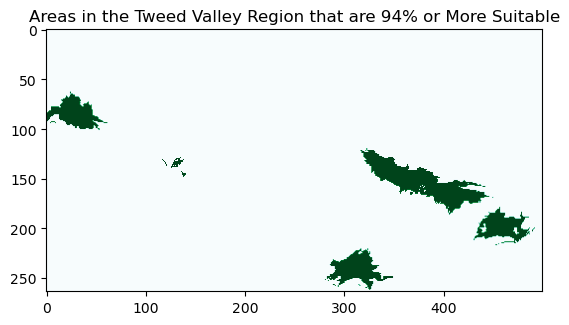

In [42]:
plt.imshow(MCE_map, cmap='BuGn')
plt.title("Areas in the Tweed Valley Region that are 94% or More Suitable")
plt.show()

### 2.3 Python Analyses

Using Python in Jupyter Notebook, analysis of the weekly footfall and population data was carried out and then used alongside the results of the MCE map to determine the most suitable areas for new EV charging points. These two factors were not included in the MCE map as the data did not have a geo-reference, so did not lend itself to the geo-spatial analysis of the MCE map. Using Python code, the population and weekly footfall data were plotted against each other in a simple scatter plot (figure 3).

**Figure 3: Plot of population against weekly footfall of each town in the Tweed Valley Area.**

C:\Users\44750\AppData\Local\Temp\ipykernel_19788\4169904714.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(towns))


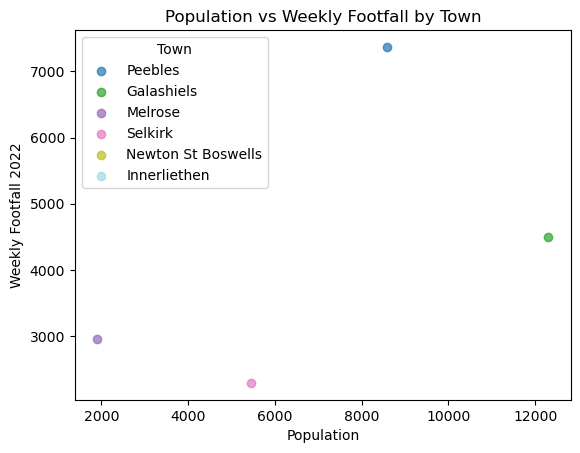

In [48]:
towns = TweedValley_PopvsFootfall['Town'].unique()
colors = plt.cm.get_cmap('tab20', len(towns))

for i, town in enumerate(towns):
    town_data = TweedValley_PopvsFootfall[TweedValley_PopvsFootfall['Town'] == town]
    plt.scatter(town_data['Population'], town_data['Weekly_Footfall_2022'], 
                label=town, color=colors(i), alpha=0.7)

plt.xlabel('Population')
plt.ylabel('Weekly Footfall 2022')
plt.title('Population vs Weekly Footfall by Town')

plt.legend(title='Town')

plt.show()

To determine the locations in the study area that may have the highest demand for more EV charging points, an equation to assess the correlation between population density and weekly footfall was used. The population density was calculated using the population data and area data of each town using the formula below.

*Pop Density = Population / Area in km2*

This data was then used in the formula below to produce a demand score for each town.

*Demand Score = Pop Density * Weekly Footfall*

From this, each town now had a unique demand score value assigned to it, indicating which town would need new EV charging points the most (see appendix, table 1). This data was plotted in a bar chart to visualise which town had the highest demand score (figure 4).

**Figure 4: Bar plot showing how demand score varies by each town in the Tweed Valley region.**

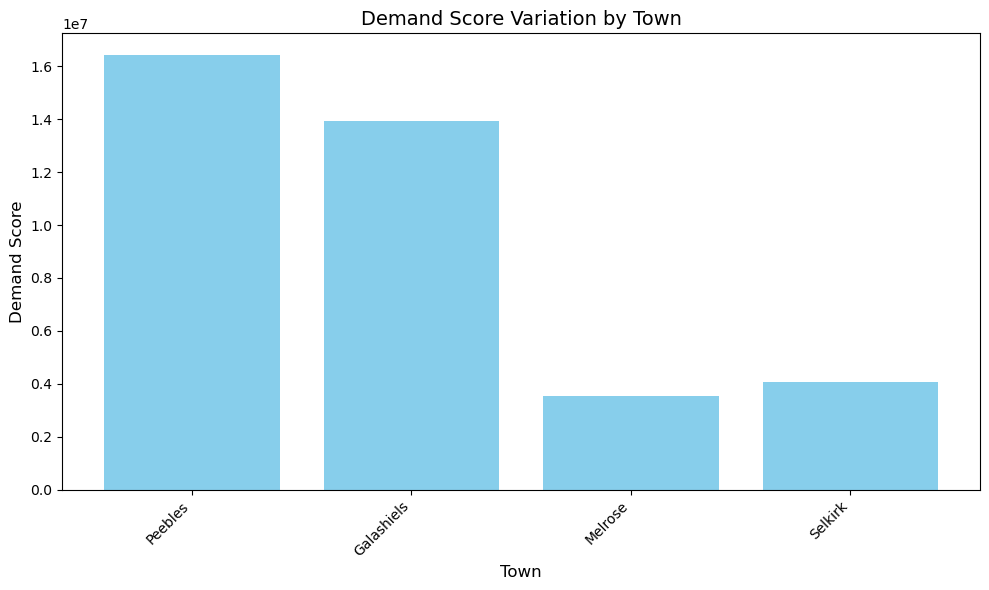

In [50]:
TweedValley_DemandScore = pd.DataFrame(TweedValley_DemandScore)

plt.figure(figsize=(10, 6))
plt.bar(TweedValley_DemandScore['town'], TweedValley_DemandScore['ev demand score'], color='skyblue')

plt.title('Demand Score Variation by Town', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Demand Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Results

The MCE map of 94% or more suitability (figure 2) illustrates the areas that are most suitable for potential new EV charging stations in the study area based on the criteria already mentioned of proximity to car parks; proximity to roads; proximity to powerlines and proximity to existing charge points. Peebles is located furthest West on the MCE map; Innerleithen is located East of Peebles; Galashiels is the Western part of the wide region sitting between 300 and 380 on the x-axis; Melrose is the Eastern part of the wide region sitting between 380 and 440 on the x-axis; Selkirk is the Southernmost area located around 300 on the x-axis; Newton St Boswells is located southeast of Galashiels and Melrose.

The scatter plot shown in figure 3 visualises how Peebles, while not being the most populated town in the region at 8581, has the most weekly footfall at 7370, compared to Galashiels which has a significantly larger population at 12302 and a footfall of roughly a third of its population at 4500. Melrose has a much smaller population at 1904, with a relatively large footfall of 2950, compared to its population. Selkirk has a moderately large population at 5458 with the lowest footfall of 2290. The population of Newton St Boswells is 1470 and of Innerleithen is 3180, however there is no data on the weekly footfall in these towns which is why they do not have representative points in the plot.

The bar chart in figure 4 shows each town’s EV demand scores which is a proxy value representing how much new EV charging points are needed in each town. A higher value suggests a higher demand for new EV charging points. Every town in figure 4 is also visualised in the MCE map. Peebles has by far the highest demand score of the towns in the study area at 1.642649e+07. Galashiels has the second highest demand score at 1.394433e+07. Melrose and Selkirk both have significantly smaller demand scores at 0.3532579e+07 and 0.4056741e+07. Using the results from these two outputs (figure 2 and 4), there are clear areas of higher demand.

## 4. Discussion

With the transition towards a greener economy and lifestyle and the goal of net zero emissions, EV charging points are a key part of the infrastructure needed to facilitate this change. Because of this, the demand for more EV charging points will undoubtedly increase in the future. This study assumes that increasing use of EVs would link to an increased number of tourists needing access to EV charging points.

Town footfall is a key indicator for whether development in general, is likely to bring investment to the local community based around town centres. If there is low footfall across an area then the likelihood of investment will decrease. To continue development, investment is needed, which is dependent on the footfall figures of an area (Manchester Metropolitan University, 2020). In this study, footfall has been used as an indicator of passing trade and tourism activity in the study area, linked to the potential demand for new EV charging points.

The results of the different outputs produced in this study have identified potential areas where there is a need for development of EV charging infrastructure. From the MCE map, it is clear that the main areas of interest that have high suitability based on the chosen criteria are Peebles, Innerleithen, Galashiels, Melrose, Newton St Boswells and Selkirk. Some of these towns have a significant number of tourists visiting for many different reasons. For example, Peebles and Innerleithen are known for their natural beauty and are hotspots for mountain biking, which attracts many visitors from within Scotland, the rest of Britain and abroad (Visit Scotland, 2024a; Visit Scotland 2024b; Forestry and Land Scotland, 2024). Melrose and Selkirk are also tourist destinations for their natural landscape and for their rich cultural history, with monuments which played important roles in various key periods of Scotland’s history (Visit Scotland, 2024c; Visit Scotland, 2024d). When analysing the footfall data compared to population, it is clear that proportionally, Peebles and Melrose would be key areas for charging points, due to their high weekly footfall numbers compared to the other towns in the study area. Analysing the areas defined in the MCE map in association with the EV demand scores for the towns where footfall data was available, helped to refine the most suitable locations. The EV demand scores suggest that Peebles is the area where new EV charging points are needed most. The results also suggest that Melrose has the least demand, which may not be entirely accurate. Proportionally, Melrose has the highest weekly footfall compared to its population. This fact does not seem to be reflected in its demand score, which is likely due to its small population. The missing data for Newton St Boswells and Innerleithen also means that there are gaps in the representativeness of the results, possibly making Peebles appear to be the only key area for new EV charge points development based on the chosen criteria. The weekly footfall for Innerleithen is probably relatively high, most likely due to its close proximity to Peebles and the similar reasons for visiting, i.e. mountain biking and natural beauty. Other limitations relate to the assumptions made due to the lack of powerlines data and the inclusion of car parks determined to be most likely used by tourists, which may have affected the outcome of the MCE.

It is beyond the scope of this study to consider other data which could be relevant, such as the number of tourists using electric vehicles, partly because the data is not readily available and/or in a usable format for this type of analysis.

## 5. Conclusion

The Scottish Government have already started to move towards further development of the EV infrastructure in other parts of Scotland, and the Scottish Borders is arguably a key area for new development. The findings of this study have determined that the most suitable location for further development of EV charge points, when considering the criteria of the MCE map as well as the EV demand score in the study area, is Peebles. As already highlighted, there were a number of limitations with the data availability and its currency, particularly for the smaller towns such as Innerleithen, which are however also tourism hot spots. To refine these results, further research would be required to identify relevant data to fill current gaps. For example, data which allows a more precise assessment of the relationship between EVs uptake, tourism footfall and EV charging demand. In addition, the research could benefit from considering the results of studies on the impact on the electricity network of additional EV charging points such as the report for Scottish and Southern electricity networks (elementenergy, 2020). This is particularly relevant in areas with smaller towns where the tourist numbers can significantly outnumber the local population, such as those in the study area.

## Appendix


**Figure 1: MCE Suitability Index Map before 94% suitability was carried out.**

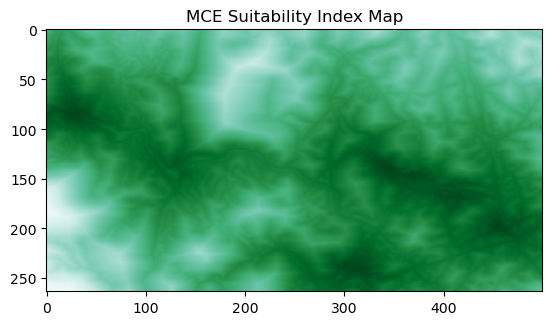

In [32]:
plt.imshow(SuitabilityIndex_map, cmap='BuGn')
plt.title("MCE Suitability Index Map")
plt.show()

**Table 1: EV demand score**

In [40]:
TweedValley_DemandScore.head(6)

,town,area,pop,footfall,pop density,ev demand score
0,Peebles,3.850,8581,7370.0,2228.831169,1.642649e+07
1,Galashiels,3.970,12302,4500.0,3098.740554,1.394433e+07
2,Melrose,1.590,1904,2950.0,1197.484277,3.532579e+06
3,Selkirk,3.081,5458,2290.0,1771.502759,4.056741e+06
4,Newton St Boswells,1.460,1470,NaN,1006.849315,NaN
5,Innerliethen,1.240,3180,NaN,2564.516129,NaN


## 6. References

Department for Transport, UK Government (2024) *Find and use data on public electric vehicle chargepoints*. Available at: https://www.gov.uk/guidance/find-and-use-data-on-public-electric-vehicle-chargepoints (Accessed: 15 November 2024).

elementenergy (2020) *E-tourism: charging demand by electric vehicles in Scottish tourist hotspots - Final report for Scottish and Southern Electricity Networks*. Available at: https://ssen-innovation.co.uk/wp-content/uploads/2021/10/20200706_E-tourism_report_V3.pdf (Accessed: 7 December 2024).

Forestry and Land Scotland (2024) *Innerleithen*. Available at: https://forestryandland.gov.scot/visit/forest-parks/tweed-valley-forest-park/innerleithen (Accessed: 6 December 2024).

Manchester Metropolitan University (2020) *Footfall: A key performance indicator*. Available at: https://squidex.mkmapps.com/api/assets/ipm/footfall-a-key-performance-indicator.pdf (Accessed: 6 December 2024).

Ordnance Survey (2024) *OS Open Roads*. Available at: https://osdatahub.os.uk/downloads/open/OpenRoads (Accessed: 15 November 2024).
Scottish Borders Council (2022a) Scottish Borders Council Footfall Report. Available at: https://www.scotborders.gov.uk/downloads/file/12102/footfall-report-2022 (Accessed: 5 December 2024).

Scottish Borders Council (2022b) *Research and Data*: Towns and Villages. Available at: https://www.scotborders.gov.uk/council-2/research-data/2 (Accessed: 5 December 2024).

Scottish Futures Trust (2021) *Electric Vehicle Charging Infrastructure Report July 2021*. Available at: https://www.scottishfuturestrust.org.uk/storage/uploads/electricvehiclereport.pdf (Accessed: 6 December).

Scottish Government (2024) *Investment in electric vehicle charging network*. Available at: https://www.gov.scot/news/investment-in-electric-vehicle-charging-network/ (Accessed: 7 December 2024).

Spatial Hub Scotland (2022) *Community Council Boundaries - Scottish Borders*. Available at: https://data.spatialhub.scot/dataset/community_council_boundaries-sb (Accessed: 4 December 2024).

Visit Scotland (2024a) *Glentress 7stanes*. Available at: https://www.visitscotland.com/info/see-do/glentress-7stanes-p317561 (Accessed: 6 December 2024).

Visit Scotland (2024b) *Innerleithen*. Available at: https://www.visitscotland.com/info/towns-villages/innerleithen-p242361 (Accessed: 7 December 2024).

Visit Scotland (2024c) *Melrose*. Available at: https://www.visitscotland.com/info/towns-villages/melrose-p242311 (Accessed: 7 December 2024).

Visit Scotland (2024d) *Selkirk*. Available at: https://www.visitscotland.com/info/towns-villages/selkirk-p242341 (Accessed: 7 December 2024).

Zheng, Y., Keith, D.R., Wang, S., Diao, M. Zhao, J. (2024) ‘Effects of electric vehicle charging stations on the economic vitality of local businesses’, *Nature Communications*, 15, 1-11.